This notebook applies a Random Forest classification model to predict the responder status of HIV patients using clinical data. The model classifies patients into one of two categories: "1" for patients who improved and "0" otherwise, helping to identify those who are responding positively to treatment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
df_test = pd.read_csv('/content/drive/MyDrive/ProtT5(6)/test_data.csv')
test_label=pd.read_csv('/content/drive/MyDrive/ProtT5(6)/test_lable.csv')
df_test

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,H,NCTCTATTAGATACAGGAGCAGATGACACAGTATTAGAAGARATGG...,CCTATTAGTCCTATTGAAACTGTACCAGTRAAATTAAAGCCAGGAA...,5.60,69
1,2,H,NCTCTATTAGATACAGGAGCAGATGATACAGTATTAGAAGAAATGA...,CCCATCAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.30,119
2,3,H,GGGCAAATAAAGGAAGCTCTATTAGATACAGGAGCAGATGATACAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.70,41
3,4,H,GGGCAACTAAAGGAAGCTCTATTAGATACAGGAGCAGATGATACAG...,CCTATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.20,48
4,5,H,GGGGGGCAACTAAAGGAAGCTCTATTAGATACAGGAGCAGATGATA...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.50,311
...,...,...,...,...,...,...
687,688,H,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.30,366
688,689,H,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.90,151
689,690,H,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAG...,CCTATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.90,411
690,691,H,CCTCAGATCACTCTTTGGCAACGACCCCTCGTCACAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.50,268


In [ ]:
test_label

,PatientID,ResponderStatus
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
687,688,1
688,689,1
689,690,1
690,691,1


In [ ]:
test_label['ResponderStatus'].value_counts()

ResponderStatus
1    346
0    346
Name: count, dtype: int64

In [ ]:
df_test = df_test.drop(columns=['PR Seq', 'RT Seq', 'PatientID','Resp'])
df_test

,VL-t0,CD4-t0
0,5.60,69
1,5.30,119
2,5.70,41
3,5.20,48
4,5.50,311
...,...,...
687,5.30,366
688,4.90,151
689,4.90,411
690,4.50,268


In [ ]:
test_label = test_label.rename(columns={'ResponderStatus': 'label'})
test_label

,PatientID,label
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
687,688,1
688,689,1
689,690,1
690,691,1


In [ ]:
x_test=df_test
y_test=test_label['label']

In [ ]:
y_test

0      1
1      0
2      1
3      0
4      1
      ..
687    1
688    1
689    1
690    1
691    1
Name: label, Length: 692, dtype: int64

Training data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/ProtT5(6)/HIV training data.csv')
df_train

,PatientID,Resp,PR Seq,RT Seq,VL-t0,CD4-t0
0,1,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCCCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAGCTAAAGCCAGGAA...,4.30,145
1,2,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.60,224
2,3,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAAGGTAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.20,1017
3,4,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAATAAGGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.70,206
4,5,0,CCTCAAATCACTCTTTGGCAACGACCCCTCGTCGCAGTAAAGATAG...,CCCATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.50,572
...,...,...,...,...,...,...
995,996,0,NaN,CCCATTAGTCCTATTGARACTGTACCAGTAMAATTAAAGCCAGGAA...,3.15,354
996,997,0,NaN,CCCATYAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,5.50,50
997,998,0,NaN,CCCATYAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,4.10,369
998,999,0,NaN,CCTATTAGTCCTATTGAAACTGTACCAGTAAAATTAAAGCCAGGAA...,3.37,127


In [ ]:
df_train['Resp'].value_counts()

Resp
0    794
1    206
Name: count, dtype: int64

In [ ]:
df_train = df_train.drop(columns=['PR Seq', 'RT Seq', 'PatientID'])
df_train

,Resp,VL-t0,CD4-t0
0,0,4.30,145
1,0,3.60,224
2,0,3.20,1017
3,0,5.70,206
4,0,3.50,572
...,...,...,...
995,0,3.15,354
996,0,5.50,50
997,0,4.10,369
998,0,3.37,127


Doubling rows

In [ ]:
df_label_1 = df_train[df_train['Resp'] == 1]

df_label_1_upsampled = resample(df_label_1,
                                replace=True,  # דגימה עם החזרה
                                n_samples=(df_train['Resp'] == 0).sum(),  # מספר השורות של תווית 0
                                random_state=42)  # עבור שחזור תוצאות

df_balanced = pd.concat([df_train, df_label_1_upsampled], ignore_index=True)

print(df_balanced['Resp'].value_counts())

Resp
1    1000
0     794
Name: count, dtype: int64


In [ ]:
df_balanced

,Resp,VL-t0,CD4-t0
0,0,4.30,145
1,0,3.60,224
2,0,3.20,1017
3,0,5.70,206
4,0,3.50,572
...,...,...,...
1789,1,4.90,93
1790,1,5.60,256
1791,1,5.00,335
1792,1,4.25,299


In [ ]:
y_train=df_balanced['Resp']
x_train = df_balanced.drop(columns=['Resp'])

In [ ]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1789    1
1790    1
1791    1
1792    1
1793    1
Name: Resp, Length: 1794, dtype: int64

In [ ]:
x_train

,VL-t0,CD4-t0
0,4.30,145
1,3.60,224
2,3.20,1017
3,5.70,206
4,3.50,572
...,...,...
1789,4.90,93
1790,5.60,256
1791,5.00,335
1792,4.25,299


scaling

In [ ]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

#Scaling

scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)


RandomForest Model

Accuracy: 0.5606936416184971
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.79      0.64       346
           1       0.61      0.33      0.43       346

    accuracy                           0.56       692
   macro avg       0.58      0.56      0.54       692
weighted avg       0.58      0.56      0.54       692



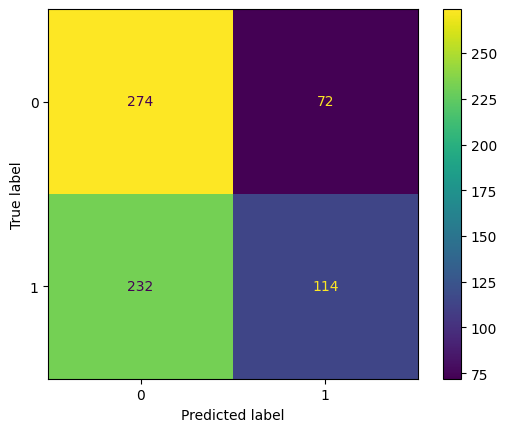

AUC: 0.5606936416184972


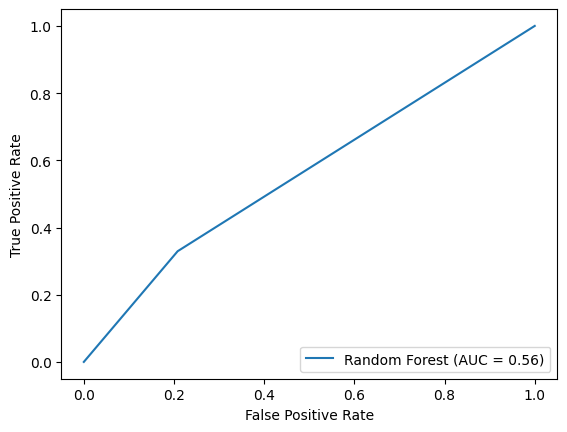

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

The accuracy is 56%